In [7]:
import json
import os
from collections import Counter
import requests
from tqdm import tqdm
from wikidata.client import Client

In [2]:
parent_folder = 'insert here your local path to the folder storing all datasets'
folder = parent_folder + 'artworks/' # choose here the name of a dataset folder

In [ ]:
def count_entities(input_folder):    
    i = 0
    for filename in tqdm(os.listdir(input_folder)):
            lista = []
            f = os.path.join(input_folder, filename)
            json_file = open(f)
            data = json.load(json_file)
            for key in data['entities']:
                i +=1
    print(i)

In [3]:
def data_subgroups(input_folder, out_folder_name, file_name, selected_classes_list, i):

    out_path = os.path.join(parent_folder, out_folder_name)

    if not os.path.exists(out_path):
        os.makedirs(out_path)

    new_data = {}

    for filename in tqdm(os.listdir(input_folder)):
        lista = []
        f = os.path.join(input_folder, filename)
        json_file = open(f)
        data = json.load(json_file)
        for key in data['entities']:
            list_of_classes = []
            for claim in data['entities'][key]['claims']['P31']:
                class_id = claim['mainsnak']['datavalue']['value']['id']
                list_of_classes.append(class_id)

            if (set(list_of_classes) & set(selected_classes_list)):
                lista.append(key)
        
        for key in lista:
            new_data.update({key:data['entities'][key]})
            while len(new_data) >= 50:
                data_to_write = {"entities": dict(list(new_data.items())[0:50]), "success": 1}
                i += 1
                with open(out_path + '/' + file_name + str(i) + '.json', 'w') as new_f:
                    json.dump(data_to_write, new_f)
                new_data = dict(list(new_data.items())[50:])
                data_to_write = {}

        for el in lista:
            del data['entities'][el]
        with open(f, "w") as jsonFile:
            json.dump(data, jsonFile)

    if len(new_data) > 0:
        i += 1
        data_to_write = {"entities": dict(list(new_data.items())[0:50]), "success": 1}
        with open(out_path + '/' + file_name + str(i) + '.json', 'w') as new_f:
                json.dump(data_to_write, new_f)   

In [ ]:
pop_cult_class_file = open(parent_folder + 'intermediate_files/pop_culture_classes.json')
pop_culture_classes = json.load(pop_cult_class_file)

data_subgroups(folder, 'pop', 'pop_culture', pop_culture_classes, 0)

In [ ]:
visual_class_file = open(parent_folder + 'intermediate_files/visual_heritage_classes.json')
visual_classes = json.load(visual_class_file)

data_subgroups(folder, 'visual', 'visual', visual_classes, 0)

In [ ]:
textual_class_file = open(parent_folder + 'intermediate_files/textual_heritage_classes.json')
textual_classes = json.load(textual_class_file)

data_subgroups(folder, 'text', 'textual', textual_classes, 0)

In [ ]:
def select_duplicates(folder):
    all_entities = []
    for filename in tqdm(os.listdir(folder)):
        f = os.path.join(folder, filename)
        json_file = open(f)
        data = json.load(json_file)
        for key in data['entities']:
            all_entities.append(key)

    counted_keys = Counter(all_entities)

    duplicates = {}
    for x,y in counted_keys.items():
        if y > 1:
            duplicates.update({x:y})

    n=0
    for k,v in duplicates.items():
        n+=v-1
    print(n) # if the printed result is 0 no duplicates exist in the dataset
        
    return counted_keys

In [ ]:
def remove_duplicates(folder, duplicates):   
    for filename in tqdm(os.listdir(folder)):
        lista = []
        f = os.path.join(folder, filename)
        json_file = open(f)
        data = json.load(json_file)
        for key in data['entities']:
            if duplicates[key] > 1:
                lista.append(key)
                duplicates = { **duplicates, key: duplicates[key]-1}
        for el in lista:
            del data['entities'][el]
            with open(f, "w") as jsonFile:
                json.dump(data, jsonFile)  

In [13]:
def compact_jsons(folder, output_folder, filename_prefix, i):
    new_data = {}
    for filename in tqdm(os.listdir(folder)):
        f = os.path.join(folder, filename)
        json_file = open(f)
        data = json.load(json_file)
        if len(data['entities']) > 0:
            new_data.update(data['entities'])
        while len(new_data) >= 50:
            data_to_write = {"entities": dict(list(new_data.items())[0:50]), "success": 1}
            i += 1
            with open(output_folder + filename_prefix + str(i) + '.json', 'w') as new_f:
                json.dump(data_to_write, new_f)
            new_data = dict(list(new_data.items())[50:])
            data_to_write = {}
                
    if len(new_data) > 0:
        i += 1
        data_to_write = {"entities": dict(list(new_data.items())[0:50]), "success": 1}
        with open(output_folder + filename_prefix + str(i) + '.json', 'w') as new_f:
                json.dump(data_to_write, new_f)                 

In [ ]:
compact_jsons(parent_folder + '/visual', 'data/visual2/', 'visual')
compact_jsons(parent_folder + '/text', 'data/textual2/', 'textual')
compact_jsons(parent_folder + '/pop', 'data/pop2/', 'pop_culture')

In [ ]:
count_entities(parent_folder + '/textual2')
count_entities(parent_folder + '/visual2')
count_entities(parent_folder + '/pop2')

In [40]:
def check_json(folder_path):

    for filename in tqdm(os.listdir(folder_path)):
        f = os.path.join(folder_path, filename)
        json_file = open(f)
        try:
            data = json.load(json_file)
        except:
            print('error occurred at:', f)
        
check_json(parent_folder + '/artworks')

  2%|█▎                                                                            | 230/13705 [00:04<04:37, 48.64it/s]

error occurred at: C:/Users/valep/OneDrive/Documenti/PhD/Conjectures/ADHO23/experiments/data//artworks\artwork10395.json


 61%|██████████████████████████████████████████████▋                              | 8319/13705 [02:48<01:32, 58.35it/s]

error occurred at: C:/Users/valep/OneDrive/Documenti/PhD/Conjectures/ADHO23/experiments/data//artworks\artwork37113.json


100%|████████████████████████████████████████████████████████████████████████████| 13705/13705 [04:49<00:00, 47.40it/s]


In [ ]:
check_json(parent_folder + '/visual2')
check_json(parent_folder + '/pop2')
check_json(parent_folder + '/text')

In [ ]:
print('#### ENTITIES IN TEXT FOLDER ######')
count_entities(parent_folder + '/text')
txt_duplicates = select_duplicates(parent_folder + '/text')
count_entities(parent_folder + '/text')

print('#### ENTITIES IN VISUAL FOLDER ######')
count_entities(parent_folder + '/visual')
viz_duplicates = select_duplicates(parent_folder + '/visual')
count_entities(parent_folder + '/visual')

print('#### ENTITIES IN POP FOLDER ######')
count_entities(parent_folder + '/pop')
pop_duplicates = select_duplicates(parent_folder + '/pop')
remove_duplicates(parent_folder + '/pop', pop_duplicates)   
count_entities(parent_folder + '/pop')

left_duplicates = select_duplicates(parent_folder + '/artworks')
remove_duplicates(parent_folder + '/artworks', left_duplicates)

In [ ]:
remove_duplicates(parent_folder + '/text', txt_duplicates)   
remove_duplicates(parent_folder + '/visual', viz_duplicates)  
remove_duplicates(parent_folder + '/pop', pop_duplicates)   
remove_duplicates(parent_folder + '/artworks', left_duplicates)

In [ ]:
count_entities(parent_folder + '/text')
count_entities(parent_folder + '/visual')
count_entities(parent_folder + '/pop')
count_entities(parent_folder + '/artworks')

In [23]:
temp_dict = {}
for filename in tqdm(os.listdir(parent_folder + '/artworks')):
    f = os.path.join(parent_folder + '/artworks', filename)
    json_file = open(f)
    data = json.load(json_file)
    for key in data['entities']:
        for claim in data['entities'][key]['claims']['P31']:
            class_id = claim['mainsnak']['datavalue']['value']['id']
            if class_id not in temp_dict:
                temp_dict.update({class_id:1})
            else:
                temp_dict.update({class_id:temp_dict[class_id] + 1})
                
sorted_classes = sorted(temp_dict.items(), key=lambda x:x[1], reverse=True)    

# xd = open("query.json")
# xdd = json.load(xd)
# for x in sorted_classes:
#     for y in xdd:
#         value = y['item'].replace('http://www.wikidata.org/entity/', '')
#         if x[0] == value:
#             print("\"" + value + "\",")
    

# for x in sorted_classes:
#     for y in theatrica_genre:
#         if x[0] == y:
#             print("\"" + y + "\",")

print(len(sorted_classes))
client = Client() 
for x in sorted_classes:
    if x[1] < 15 and x[1] > 0:
        try:
            entity = client.get(x[0], load=True)
            print(x, entity.label.texts['en'])
        except:
            print(x)

100%|██████████████████████████████████████████████████████████████████████████████| 1737/1737 [00:27<00:00, 63.46it/s]


1640
('Q372934', 14) glacial erratic
('Q97584077', 14) agalma
('Q5784272', 14) high relief
('Q1234523', 14) naveta
('Q2593777', 14) grave field
('Q358', 14) heritage site
('Q12313625', 14) Memorial stones to the reunification of Denmark 1920
('Q3408995', 14) prelude and fugue
('Q926743', 14) Madonna
('Q47468117', 14) dance performance
('Q85475422', 14) amusement park show
('Q45999579', 14) magic trick
('Q65598478', 14) collaborative single
('Q79504355', 14) leatherwork
('Q3456301', 14) ship replica
('Q22698', 13) park
('Q219538', 13) scheduled monument
('Q2046325', 13) round barrow
('Q627603', 13) cartoon
('Q4817', 13) column
('Q105213328', 13)
('Q6304550', 13) anta
('Q478679', 13) café-chantant
('Q507850', 13) Marian apparition
('Q29857932', 13) kinetic object
('Q1539580', 13) pelike
('Q513550', 12) hermitage
('Q200141', 12) necropolis
('Q1935728', 12) stone circle
('Q5151485', 12) comedy album
('Q43638585', 12) Stolperschwelle
('Q35509', 12) cave
('Q5892712', 12) Honda Sports Award
(

('Q4895508', 4) battlefield
('Q631305', 4) rock formation
('Q1244442', 4) school building
('Q55622767', 4) memorial hall
('Q8192099', 4) bonshō
('Q1404150', 4) rock
('Q169560', 4) caravel
('Q27996898', 4) perspective box
('Q2250805', 4) school atlas
('Q59274741', 4) Lutherbuchen
('Q96086399', 4) former school building
('Q42470', 4) motto
('Q1194039', 4) maritime flag
('Q28966125', 4) needlework
('Q1474754', 4) level staff
('Q837185', 4) kaftan
('Q6017969', 4) scenic viewpoint
('Q7929496', 4) viking ship replica
('Q492255', 4) tetrapylon
('Q16346', 4) speech synthesis
('Q22905960', 4) national seals of Japan
('Q1345069', 4) entrance grave
('Q828322', 4) platform game
('Q255595', 4) ossuary
('Q2067046', 4) ensign
('Q27077627', 4) naval ensign
('Q106772852', 4) Red Nose Day
('Q2055789', 4) passage tombs in Ireland
('Q47597', 4) architectural plan
('Q70344413', 4) dynamic theme
('Q61449115', 4) SHAREfactory Theme
('Q1720510', 4) murder stone
('Q5567091', 4) glass art
('Q19903558', 4) bobbi

('Q83641', 2) Neapolitan nativity scene
('Q352956', 2) survey marker
('Q98476958', 2) library lion
('Q191437', 2) Zeppelinstein
('Q223557', 2) physical object
('Q12493', 2) dome
('Q132413', 2) Hodegetria
('Q845945', 2) Shinto shrine
('Q421214', 2) acroterion
('Q7062022', 2) not-for-profit arts organization
('Q35516', 2) WrestleMania
('Q22669562', 2) soft-ground etching
('Q133722', 2) bianzhong
('Q716488', 2) Mandarin square
('Q695992', 2) niche
('Q110438165', 2) podcast announcement episode
('Q109684855', 2) teaser podcast episode
('Q1193753', 2) stone row
('Q131436', 2) board game
('Q26268364', 2) boulder burial
('Q11305042', 2) videogame expansion pack
('Q653208', 2) monolith
('Q2054905', 2) pennant
('Q203161', 2) tricolour
('Q74161894', 2) Chinese TV series
('Q107640824', 2) unproduced television series season
('Q2295790', 2) film screening
('Q185600', 2) portico
('Q11269382', 2) Monuments of Jeollanam-do
('Q46135307', 2) nation at sport competition
('Q11492855', 2) Information prog

('Q1969448', 1) term
('Q2548068', 1)
('Q68324949', 1)
('Q11076343', 1) type A amphora
('Q3695082', 1) sign
('Q107357104', 1) type of dance
('Q1863818', 1) maritime museum
('Q1045481', 1) filming location
('Q1064394', 1) Space Shuttle orbiter
('Q2171942', 1) rowing ship
('Q797765', 1) inclined tower
('Q11436', 1) aircraft
('Q1474636', 1) scenery flat
('Q77115', 1) community center
('Q48085397', 1) municipal library of Japan
('Q207452', 1) ship of the line
('Q20034791', 1) defensive tower
('Q11707', 1) restaurant
('Q163759', 1) horn
('Q3278565', 1) house lighthouse
('Q6459121', 1) LMS Patriot Class
('Q1195684', 1) rowing boat
('Q854429', 1) portal
('Q647341', 1) Santos-Dumont 14-bis
('Q6581615', 1) thermae
('Q98582173', 1) fictional archaeological site
('Q63959448', 1) fictional architectural structure
('Q721931', 1) shed
('Q38720', 1) windmill
('Q15720873', 1) fictional sword
('Q6907896', 1) moonlight tower
('Q2296538', 1) bugle-call
('Q4327689', 1) sheet music
('Q1435588', 1) glass bea

('Q1584134', 1) mound
('Q89298567', 1) komonjo
('Q24807694', 1) Gwaebul
('Q1684933', 1)
('Q3400905', 1) Severn-Cotswold tomb
('Q108404215', 1) hologram concert residency
('Q108404216', 1) comeback concert residency
('Q108475169', 1) hologram artist
('Q60424', 1) terracotta
('Q5994', 1) piano
('Q104911496', 1) military flag
('Q110757460', 1) Joy Awards ceremony
('Q12280', 1) bridge
('Q110407926', 1) modal system
('Q105825301', 1) instrumental ballade
('Q108346082', 1) release group
('Q207628', 1) musical composition
('Q732577', 1) publication
('Q107461879', 1) item of collection or exhibition
('Q1458203', 1) transcription
('Q2864716', 1) featherwork
('Q207707', 1) choir
('Q16905550', 1) cycle of frescoes
('Q737406', 1) golden hats
('Q1820704', 1) clearance cairn
('Q29469577', 1) LGBT historic place
('Q58917', 1) adit
('Q947103', 1) watchtower
('Q152081', 1) concentration camp
('Q6501349', 1) parking lot
('Q543654', 1) rathaus
('Q3950', 1) villa
('Q517820', 1) carriage house
('Q21130185'

('Q81113235', 1) SCP
('Q42605452', 1) fictional musical work
('Q1140046', 1) mathematical notation


In [27]:
def remove_empty_files(folder):   
    
    lista = []
    for filename in tqdm(os.listdir(folder)):
        f = os.path.join(folder, filename)
        json_file = open(f)
        print(filename)
        data = json.load(json_file)
        empty_dict = {'entities': {}, 'success': 1}
        if data == empty_dict:
            lista.append(filename)
        
    for fn in tqdm(lista):
        os.remove(os.path.join(folder, fn))

In [ ]:
irrelevant_classes = [x[0] for x in sorted_classes if x[1] > 800]

data_subgroups(folder, 'others', 'other', irrelevant_classes, 0)

In [ ]:
remove_empty_files(parent_folder + '/artworks')

In [12]:
pop_cult_class_file = open(parent_folder + 'intermediate_files/pop_culture_classes.json')
pop_culture_classes = json.load(pop_cult_class_file)

data_subgroups(folder, 'new_pop', 'pop_culture', pop_culture_classes, 25035)

visual_class_file = open(parent_folder + 'intermediate_files/visual_heritage_classes.json')
visual_classes = json.load(visual_class_file)

data_subgroups(folder, 'new_viz', 'visual', visual_classes, 21553)

textual_class_file = open(parent_folder + 'intermediate_files/textual_heritage_classes.json')
textual_classes = json.load(textual_class_file)

data_subgroups(folder, 'new_tex', 'textual', textual_classes, 12505)

100%|██████████████████████████████████████████████████████████████████████████████| 1737/1737 [02:05<00:00, 13.86it/s]


In [17]:
#compact_jsons(parent_folder + '/new_viz', 'data/new_viz2/', 'visual', 21518)
#compact_jsons(parent_folder + '/new_tex', 'data/new_tex2/', 'textual', 12468)
compact_jsons(parent_folder + '/new_pop', 'data/new_pop2/', 'pop_culture', 25018)

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:01<00:00,  8.57it/s]


In [22]:
def copy_jsons(folder, output_folder, filename_prefix):
    i = 1
    for filename in tqdm(os.listdir(folder)):
        f = os.path.join(folder, filename)
        json_file = open(f)
        data = json.load(json_file)
        with open(output_folder + filename_prefix + str(i) + '.json', 'w') as new_f:
                json.dump(data, new_f)
        i += 1

copy_jsons(parent_folder + '/pop', 'data/new_pop/', 'pop_culture')
copy_jsons(parent_folder + '/visual', 'data/new_viz/', 'visual')
copy_jsons(parent_folder + '/textual', 'data/new_text/', 'textual')

In [ ]:
# Wikidata property for authority control for works (Q19833377)
# Wikidata property to indicate a location (Q18615777)
# Wikidata property related to time and duration (Q51077473)

# SELECT ?item ?itemLabel 
# WHERE 
# {
#   ?item wdt:P31 ?type. 
#   ?type (wdt:P279*) wd:Q19847637.
#   SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". } -
# }

In [152]:
natures_count = { "Q27058": 0, "Q41719": 0, "Q11169": 0, "Q29485": 0, "Q357662": 0, "Q603908": 0, "Q280943": 0, "Q701040": 0, "Q873222": 0, "Q880643": 0, "Q1255828": 0, "Q3918409": 0, "Q13649246": 0, "Q17024293": 0, "Q18603603": 0, "Q18122778": 0, "Q18912752": 0, "Q25895909": 0, "Q24238356": 0, "Q24025284": 0, "Q20734200": 0, "Q26932615": 0, "Q28831311": 0, "Q28962310": 0, "Q28962312": 0, "Q29509080": 0, "Q30230067": 0, "Q30108381": 0, "Q37113960": 0, "Q45025362": 0, "Q38131096": 0, "Q50376823": 0, "Q56644435": 0, "Q54943392": 0, "Q59864995": 0, "Q73290844": 0, "Q74524855": 0, "Q84590041": 0, "Q97161074": 0, "Q100349848": 0, "Q104378399": 0, "Q107217620": 0, "Q106466760": 0, "Q107356532": 0, "Q110143752": 0, "Q110290991": 0, "Q108163": 0, "Q5727902": 0, "Q4895105": 0, "Q744069": 0, "Q748250": 0, "Q21818619": 0, "Q6136054": 0, "Q32188232": 0, "unknown":0}
sourcing_count = {'Q9492':0,'Q11169':0,'Q27058':0,'Q17949':0,'Q41719':0,'Q224952':0, 'Q344495':0,'Q319141':0,'Q363948':0,'Q2478058':0,'Q2496920':0,'Q1434353':0,'Q1255828':0,'Q840148':0,'Q791801':0,'Q748250':0,'Q5432619':0,'Q5727902':0,'Q3984452':0,'Q3847033':0,'Q6878417':0,'Q7882489':0,'Q13649246':0,'Q18122778':0,'Q16868120':0,'Q16886573':0,'Q18603603':0,'Q18706315':0,'Q18912752':0,'Q21097017':0,'Q21655367':0,'Q21097088':0,'Q21683367':0,'Q22979588':0,'Q26932615':0,'Q25895909':0,'Q26162470':0,'Q26877139':0,'Q28962310':0,'Q28962312':0,'Q29998666':0,'Q28831311':0,'Q27055432':0,'Q28831311':0,'Q30230067':0,'Q30108381':0,'Q32188232':0,'Q37113960':0,'Q35779580':0,'Q41755623':0,'Q50376823':0,'Q54975531':0,'Q56644435':0,'Q59783740':0,'Q56685043':0,'Q60070514':0,'Q65088633':0,'Q73290844':0,'Q77066609':0,'Q70650920':0,'Q105675146':0,'Q86454040':0,'Q100349848':0,'Q104378399':0,'Q105769095':0,'Q109012782':0,'Q109104929':0,'Q110558700':0,'Q112980637':0,'Q110143752':0,'Q106160493':0,'Q107356532':0,'Q2132119':0,'Q900584':0}

print(len(natures_count))
print(len(sourcing_count))

all_terms = set(sourcing_count) | set(natures_count)
all_terms_count = {x:0 for x in all_terms}

all_terms_labels = {}

client = Client() 
for term in all_terms_count:
    try:
        entity = client.get(term, load=True)
        print(term, entity.label.texts['en'])
        all_terms_labels.update({term:entity.label.texts['en']})
    except:
        print('error', term)

55
73
Q106466760 manipulation
Q104378399 dubious
Q27058 approximation
Q77066609 incorrect name in source
Q7882489 Uncertain data
Q29998666 error in referenced source or sources
Q70650920 dubious role
Q744069 extrapolation
Q873222 expulsion
Q105769095 conventional date
Q107217620 unsubstantiated
Q22979588 source known to be unreliable
Q1434353 almost surely
Q112980637 unupdated
Q106160493 undetermined
Q29485 error
Q840148 almost
Q86454040 existence uncertain
Q18912752 disputed
Q18603603 hypothetically
Q28962310 rarely
Q60070514 roughly
Q105675146 misattribution
Q9492 probability
Q107356532 obsolete
Q30108381 cancelled
Q30230067 possibly
Q56644435 probably
Q109104929 approximate centre point
Q6136054 guess
Q17949 falsity
Q357662 work in process
Q2496920 uncertain knowledge
Q4895105 interim
Q5432619 false
Q18706315 hypothetical entity
Q54943392 obsolete form
Q27055432 position not accepted
Q25895909 cannot be confirmed by other sources
Q35779580 possibly invalid entry requiring further re

In [275]:
results = {}
var = 0

print(len(all_terms_labels))

def dict_update(k,v,dictionary):
    if v not in dictionary:
        l = []
        l.append(k)
        dictionary = { **dictionary, v: l}
    else:
        l = dictionary[v]
        l.append(k)
        dictionary = { **dictionary, v: l}
    return dictionary

for k,v in all_terms_labels.items():
    v = v.lower()
    if 'hypoth' in v:
        results = dict_update(k, 'hypotesis', results)
    elif 'error' in v or 'incorrect' in v:
        results = dict_update(k, 'error', results)
    elif 'approx' in v or 'circa' in v or 'roughly' in v:
        results = dict_update(k, 'approximation', results)
    elif 'dubio' in v or 'doubt' in v:
        results = dict_update(k, 'doubt', results)
    elif 'fals' in v:
        results = dict_update(k, 'falsity', results)
    elif 'estim' in v:
        results = dict_update(k, 'estimation', results)
    elif 'probab' in v:
        results = dict_update(k, 'probability', results)
    elif 'alleged' in v or 'presum' in v:
        results = dict_update(k, 'presumability', results)
    elif 'obsole' in v or 'replaced' in v or 'cancel' in v or 'unupdate' in v:
        results = dict_update(k, 'obsolete', results)
    elif 'sometimes' in v:
        results = dict_update(k, 'sometimes', results)
    elif 'incomple' in v or 'missing' in v or 'not complete' in v:
        results = dict_update(k, 'incompleteness', results)
    elif 'uncert' in v or 'question mark' in v:
        results = dict_update(k, 'uncertainty', results)
    elif 'attribution' in v and 'mis' not in v:
        results = dict_update(k, 'attribution', results)
    elif 'unknown' in v or 'undetermin' in v:
        results = dict_update(k, 'unknown', results)
    else:
        var+=1

print(len(results))
print(var)

mapping = results

101
14
54


In [436]:
natures_count = { "Q27058": 0, "Q41719": 0, "Q11169": 0, "Q29485": 0, "Q357662": 0, "Q603908": 0, "Q280943": 0, "Q701040": 0, "Q873222": 0, "Q880643": 0, "Q1255828": 0, "Q3918409": 0, "Q13649246": 0, "Q17024293": 0, "Q18603603": 0, "Q18122778": 0, "Q18912752": 0, "Q25895909": 0, "Q24238356": 0, "Q24025284": 0, "Q20734200": 0, "Q26932615": 0, "Q28831311": 0, "Q28962310": 0, "Q28962312": 0, "Q29509080": 0, "Q30230067": 0, "Q30108381": 0, "Q37113960": 0, "Q45025362": 0, "Q38131096": 0, "Q50376823": 0, "Q56644435": 0, "Q54943392": 0, "Q59864995": 0, "Q73290844": 0, "Q74524855": 0, "Q84590041": 0, "Q97161074": 0, "Q100349848": 0, "Q104378399": 0, "Q107217620": 0, "Q106466760": 0, "Q107356532": 0, "Q110143752": 0, "Q110290991": 0, "Q108163": 0, "Q5727902": 0, "Q4895105": 0, "Q744069": 0, "Q748250": 0, "Q21818619": 0, "Q6136054": 0, "Q32188232": 0}
sourcing_count = {'Q9492':0,'Q11169':0,'Q27058':0,'Q17949':0,'Q41719':0,'Q224952':0, 'Q344495':0,'Q319141':0,'Q363948':0,'Q2478058':0,'Q2496920':0,'Q1434353':0,'Q1255828':0,'Q840148':0,'Q791801':0,'Q748250':0,'Q5432619':0,'Q5727902':0,'Q3984452':0,'Q3847033':0,'Q6878417':0,'Q7882489':0,'Q13649246':0,'Q18122778':0,'Q16868120':0,'Q16886573':0,'Q18603603':0,'Q18706315':0,'Q18912752':0,'Q21097017':0,'Q21655367':0,'Q21097088':0,'Q21683367':0,'Q22979588':0,'Q26932615':0,'Q25895909':0,'Q26162470':0,'Q26877139':0,'Q28962310':0,'Q28962312':0,'Q29998666':0,'Q28831311':0,'Q27055432':0,'Q28831311':0,'Q30230067':0,'Q30108381':0,'Q32188232':0,'Q37113960':0,'Q35779580':0,'Q41755623':0,'Q50376823':0,'Q54975531':0,'Q56644435':0,'Q59783740':0,'Q56685043':0,'Q60070514':0,'Q65088633':0,'Q73290844':0,'Q77066609':0,'Q70650920':0,'Q105675146':0,'Q86454040':0,'Q100349848':0,'Q104378399':0,'Q105769095':0,'Q109012782':0,'Q109104929':0,'Q110558700':0,'Q112980637':0,'Q110143752':0,'Q106160493':0,'Q107356532':0,'Q2132119':0,'Q900584':0, "unknown":0}
all_terms = set(sourcing_count) | set(natures_count)

print(len(natures_count))
print(len(sourcing_count))

reason_for_deprecation_count = {"Q404":0,"Q17949":0,"Q18535":0,"Q27058":0,"Q29485":0,"Q34302":0,"Q41719":0,"Q122192":0,"Q132382":0,"Q133182":0,"Q140641":0,"Q154242":0,"Q170028":0,"Q180472":0,"Q180711":0,"Q181970":0,"Q186982":0,"Q189203":0,"Q189349":0,"Q190084":0,"Q190586":0,"Q192184":0,"Q194189":0,"Q203443":0,"Q204854":0,"Q208099":0,"Q208826":0,"Q210392":0,"Q213388":0,"Q214866":0,"Q217102":0,"Q217743":0,"Q230671":0,"Q230768":0,"Q231835":0,"Q272035":0,"Q280943":0,"Q282744":0,"Q305418":0,"Q308859":0,"Q309314":0,"Q309901":0,"Q311463":0,"Q319596":0,"Q325026":0,"Q327000":0,"Q331483":0,"Q334640":0,"Q337690":0,"Q363948":0,"Q410555":0,"Q452440":0,"Q464858":0,"Q473432":0,"Q476697":0,"Q483454":0,"Q483677":0,"Q502918":0,"Q506319":0,"Q517361":0,"Q519875":0,"Q545779":0,"Q557945":0,"Q559618":0,"Q560361":0,"Q567555":0,"Q570730":0,"Q574433":0,"Q587972":0,"Q600499":0,"Q610241":0,"Q614232":0,"Q631331":0,"Q643290":0,"Q647578":0,"Q680007":0,"Q680042":0,"Q685744":0,"Q693988":0,"Q696606":0,"Q721747":0,"Q728937":0,"Q734832":0,"Q748250":0,"Q759734":0,"Q759815":0,"Q776167":0,"Q791801":0,"Q796919":0,"Q811683":0,"Q826949":0,"Q827597":0,"Q844326":0,"Q846574":0,"Q851176":0,"Q854479":0,"Q858082":0,"Q862581":0,"Q877353":0,"Q878352":0,"Q879295":0,"Q880643":0,"Q910845":0,"Q929804":0,"Q998790":0,"Q1043452":0,"Q1045481":0,"Q1052281":0,"Q1064904":0,"Q1066717":0,"Q1071027":0,"Q1085588":0,"Q1121708":0,"Q1129622":0,"Q1136723":0,"Q1138586":0,"Q1140419":0,"Q1145106":0,"Q1150070":0,"Q1171224":0,"Q1185297":0,"Q1188533":0,"Q1193907":0,"Q1207505":0,"Q1210382":0,"Q1229261":0,"Q1229735":0,"Q1232589":0,"Q1236807":0,"Q1250718":0,"Q1251417":0,"Q1260827":0,"Q1263068":0,"Q1309976":0,"Q1332286":0,"Q1338119":0,"Q1348305":0,"Q1350108":0,"Q1363768":0,"Q1371427":0,"Q1371586":0,"Q1376796":0,"Q1384499":0,"Q1395509":0,"Q1395577":0,"Q1416898":0,"Q1454489":0,"Q1454723":0,"Q1571900":0,"Q1630279":0,"Q1648389":0,"Q1673271":0,"Q1682108":0,"Q1735821":0,"Q1743028":0,"Q1751943":0,"Q1753979":0,"Q1813536":0,"Q1898510":0,"Q1922815":0,"Q1938536":0,"Q1979154":0,"Q1984758":0,"Q2015967":0,"Q2051704":0,"Q2063516":0,"Q2085518":0,"Q2090618":0,"Q2166722":0,"Q2221906":0,"Q2301707":0,"Q2343619":0,"Q2356726":0,"Q2389905":0,"Q2449404":0,"Q2454100":0,"Q2478058":0,"Q2478595":0,"Q2491016":0,"Q2492572":0,"Q2496920":0,"Q2503234":0,"Q2511187":0,"Q2720909":0,"Q2727213":0,"Q2796622":0,"Q2908560":0,"Q2918584":0,"Q2920228":0,"Q2999003":0,"Q3076763":0,"Q3104453":0,"Q3112030":0,"Q3149768":0,"Q3248417":0,"Q3343293":0,"Q3348519":0,"Q3352817":0,"Q3444685":0,"Q3467464":0,"Q3544030":0,"Q3575478":0,"Q3732575":0,"Q3739281":0,"Q3769186":0,"Q3813865":0,"Q3847033":0,"Q3877969":0,"Q3918409":0,"Q3962655":0,"Q4115113":0,"Q4119183":0,"Q4388326":0,"Q4503801":0,"Q4590027":0,"Q4663389":0,"Q4691861":0,"Q4925193":0,"Q5015649":0,"Q5131849":0,"Q5135520":0,"Q5165085":0,"Q5193258":0,"Q5253643":0,"Q5282797":0,"Q5289816":0,"Q5420623":0,"Q5428139":0,"Q5432619":0,"Q5432682":0,"Q5439369":0,"Q5727902":0,"Q5909236":0,"Q5993036":0,"Q6022092":0,"Q6136054":0,"Q6428674":0,"Q6875856":0,"Q7200789":0,"Q7219623":0,"Q7234480":0,"Q7299951":0,"Q7318524":0,"Q7712947":0,"Q7833925":0,"Q7885121":0,"Q7958155":0,"Q8143062":0,"Q10357784":0,"Q10418049":0,"Q11381163":0,"Q11486291":0,"Q11486300":0,"Q11631567":0,"Q11639308":0,"Q12040628":0,"Q12139612":0,"Q12257711":0,"Q12377751":0,"Q12769393":0,"Q12780996":0,"Q13002315":0,"Q13168732":0,"Q13579947":0,"Q13634247":0,"Q13649246":0,"Q14514600":0,"Q14820227":0,"Q14946528":0,"Q15239622":0,"Q15632617":0,"Q15634554":0,"Q15893266":0,"Q15989253":0,"Q16571590":0,"Q16868120":0,"Q16879044":0,"Q16886573":0,"Q17013103":0,"Q17024293":0,"Q17055519":0,"Q17276484":0,"Q17334923":0,"Q17362920":0,"Q17538709":0,"Q17853087":0,"Q18089644":0,"Q18195782":0,"Q18411409":0,"Q18511800":0,"Q18603603":0,"Q18603731":0,"Q18644427":0,"Q18674452":0,"Q18748141":0,"Q18912752":0,"Q19357621":0,"Q19404626":0,"Q19778981":0,"Q19801088":0,"Q19860854":0,"Q20734200":0,"Q20830903":0,"Q20990956":0,"Q21096955":0,"Q21097017":0,"Q21097088":0,"Q21124171":0,"Q21152551":0,"Q21175641":0,"Q21262209":0,"Q21441764":0,"Q21469979":0,"Q21502838":0,"Q21514702":0,"Q21522908":0,"Q21557777":0,"Q21655367":0,"Q21683863":0,"Q21701659":0,"Q21848415":0,"Q21887121":0,"Q21996602":0,"Q22039296":0,"Q22296213":0,"Q22674925":0,"Q22712824":0,"Q22979588":0,"Q23005333":0,"Q23009439":0,"Q23077442":0,"Q23090331":0,"Q24037741":0,"Q24238356":0,"Q24629887":0,"Q25054195":0,"Q25235916":0,"Q25345174":0,"Q25391834":0,"Q25397937":0,"Q25796498":0,"Q25810847":0,"Q25895909":0,"Q26162470":0,"Q26256296":0,"Q26262236":0,"Q26944781":0,"Q27055388":0,"Q27229605":0,"Q27921563":0,"Q27949697":0,"Q27988255":0,"Q28091153":0,"Q28370743":0,"Q28831311":0,"Q28846358":0,"Q28874503":0,"Q28962312":0,"Q29168209":0,"Q29509080":0,"Q29569274":0,"Q29863201":0,"Q29933798":0,"Q29998666":0,"Q30014662":0,"Q30108381":0,"Q30126155":0,"Q30349290":0,"Q30580660":0,"Q35145263":0,"Q35647389":0,"Q35773207":0,"Q35779580":0,"Q35966949":0,"Q37113960":0,"Q39811647":0,"Q39894595":0,"Q39911916":0,"Q41755623":0,"Q41787617":0,"Q42097313":0,"Q42415624":0,"Q42696902":0,"Q42727519":0,"Q44374960":0,"Q45025362":0,"Q45157076":0,"Q45403344":0,"Q45887982":0,"Q47496130":0,"Q48233543":0,"Q49932764":0,"Q50376823":0,"Q50379085":0,"Q51734763":0,"Q51845721":0,"Q51884830":0,"Q51921823":0,"Q51984269":0,"Q52679949":0,"Q53710082":0,"Q54554025":0,"Q54767019":0,"Q54806642":0,"Q54943392":0,"Q54975531":0,"Q54976355":0,"Q55107540":0,"Q55193796":0,"Q55570340":0,"Q56631052":0,"Q56998693":0,"Q57195384":0,"Q57495609":0,"Q58007288":0,"Q58370623":0,"Q58439442":0,"Q58839938":0,"Q59016370":0,"Q59237924":0,"Q59550254":0,"Q59555084":0,"Q59864995":0,"Q60021722":0,"Q60311385":0,"Q60457486":0,"Q61475894":0,"Q61915880":0,"Q62024811":0,"Q62091220":0,"Q62391983":0,"Q62606058":0,"Q63065035":0,"Q63077779":0,"Q64445414":0,"Q64728500":0,"Q64728693":0,"Q64728694":0,"Q64737957":0,"Q65016715":0,"Q65088633":0,"Q65560376":0,"Q65706543":0,"Q65948447":0,"Q66107668":0,"Q66439731":0,"Q66475652":0,"Q66547754":0,"Q67125514":0,"Q67203058":0,"Q67932942":0,"Q68648103":0,"Q70390311":0,"Q70392051":0,"Q70650920":0,"Q70918737":0,"Q71533355":0,"Q71535331":0,"Q71536040":0,"Q71536244":0,"Q71538638":0,"Q71887839":0,"Q72951433":0,"Q73290844":0,"Q73545549":0,"Q74524855":0,"Q74557669":0,"Q75173816":0,"Q75209826":0,"Q75801665":0,"Q76449977":0,"Q76453668":0,"Q76500861":0,"Q76761345":0,"Q77253277":0,"Q77980264":0,"Q78156572":0,"Q78694451":0,"Q80122004":0,"Q80657659":0,"Q80833195":0,"Q80996755":0,"Q80997055":0,"Q81068910":0,"Q82549269":0,"Q83371408":0,"Q84590041":0,"Q86191979":0,"Q87346598":0,"Q87406427":0,"Q87479384":0,"Q87524790":0,"Q87723111":0,"Q87772960":0,"Q88903067":0,"Q89031984":0,"Q89317853":0,"Q89665509":0,"Q89904285":0,"Q90177495":0,"Q91135299":0,"Q91778853":0,"Q91778954":0,"Q92056121":0,"Q93955709":0,"Q94601911":0,"Q95677783":0,"Q95968315":0,"Q95987004":0,"Q96086516":0,"Q96191913":0,"Q96242333":0,"Q97107245":0,"Q97445863":0,"Q97479954":0,"Q98034328":0,"Q98052232":0,"Q98271705":0,"Q98386534":0,"Q98398200":0,"Q98523542":0,"Q98537072":0,"Q99460987":0,"Q99496317":0,"Q99539439":0,"Q99562365":0,"Q99572267":0,"Q99949087":0,"Q99976017":0,"Q100148250":0,"Q100331739":0,"Q100700854":0,"Q100701259":0,"Q101029366":0,"Q101076817":0,"Q103598308":0,"Q103598309":0,"Q103598310":0,"Q103864591":0,"Q103875254":0,"Q104029445":0,"Q104127786":0,"Q104172943":0,"Q104245838":0,"Q104255002":0,"Q104378399":0,"Q104602651":0,"Q104653273":0,"Q104671559":0,"Q104976733":0,"Q105076526":0,"Q105223969":0,"Q105631494":0,"Q105675146":0,"Q105709687":0,"Q105773155":0,"Q105812742":0,"Q105827064":0,"Q105980786":0,"Q106626749":0,"Q106651934":0,"Q106795737":0,"Q106849510":0,"Q106860610":0,"Q106866757":0,"Q106980928":0,"Q107028274":0,"Q107037229":0,"Q107214772":0,"Q107228472":0,"Q107269364":0,"Q107278014":0,"Q107345922":0,"Q107348938":0,"Q107356532":0,"Q107366274":0,"Q107379991":0,"Q107410318":0,"Q107631537":0,"Q107631600":0,"Q107710355":0,"Q107724711":0,"Q107936414":0,"Q108028808":0,"Q108172170":0,"Q108180274":0,"Q108281296":0,"Q108385350":0,"Q108429588":0,"Q108429590":0,"Q108630154":0,"Q108743139":0,"Q108895441":0,"Q109290665":0,"Q109324480":0,"Q109352971":0,"Q109659893":0,"Q109667022":0,"Q110161795":0,"Q110208058":0,"Q110492913":0,"Q110643252":0,"Q110646418":0,"Q110678154":0,"Q110723780":0,"Q110770329":0,"Q111019038":0,"Q111043064":0,"Q111083433":0,"Q111149276":0,"Q111189544":0,"Q111253654":0,"Q111303008":0,"Q111360696":0,"Q111383754":0,"Q111472389":0,"Q111678745":0,"Q111678787":0,"Q112181004":0,"Q112219947":0,"Q112226262":0,"Q112309110":0,"Q112341165":0,"Q112619903":0,"Q112621540":0,"Q112624709":0,"Q112669418":0,"Q112930606":0,"Q112943271":0,"Q112943275":0,"Q113202767":0,"Q113319997":0,"Q113358113":0,"Q113359274":0,"Q113360982":0,"Q113485150":0,"Q113547919":0,"Q113558184":0,"Q113570178":0,"Q113623390":0,"Q113704132":0,"Q113930396":0,"Q113989762":0,"Q114239895":0,"Q114342413":0,"Q114401995":0,"Q114713247":0,"Q115099570":0,"Q115323571":0}    
prefixes = ['no primary source', 'deletion', 'refuse', 'citation needed', 'uncitedness','fail', 'dubious', 'nonsense','anomaly','demolition','accurancy and precision', 'deception', 'doubt','wrong', 'minority claim','refutes','rejection', 'replace', 'rectif', 'mistake', 'rumor','suspension', 'estima', 'conflict', 'impossib', 'incorrect', 'errat', 'denial', 'invalid','unofficial','mistake', 'impossib', 'Unavaila', 'implaus','mis', 'archaism', 'nothing', 'presump', 'retroactive', 'counterfeit','contradi','disqualifi', 'anonymity','abandon', 'obsole', 'deprecat', 'hoax', 'anachroni', 'unofficial', 'cancel', 'unknown','possibly', 'may be', 'disput', 'forgery', 'guess', 'supersede', 'hypoth', 'error', 'approx', 'incorrect', 'circa', 'roughly', 'fals', 'estim', 'probab', 'alleg', 'obsol', 'sometimes', 'incomple', 'uncert', 'attrib', 'unkown', 'not']  

new = {}

client = Client() 
for term in reason_for_deprecation_count:
    try:
        entity = client.get(term, load=True)
        rfd_labels.update({term:entity.label.texts['en']})
        for x in prefixes:
            if x.lower() in entity.label.texts['en']:
                new.update({term:entity.label.texts['en']})
        if term not in new.keys():
            print(term, entity.label.texts['en'])
            
    except:
        print('error', term)

print(new)

54
74
Q404 404 Not Found
Q122192 redundancy
Q133182 superstition
Q180472 adoption
Q180711 search engine optimization
Q186982 overtime
Q189349 urban legend
Q190586 neocolonialism
Q192184 Saint Helena, Ascension and Tristan da Cunha
Q194189 sale
Q203443 tombstone
Q204854 première
Q208099 coming out
Q208826 height
Q210392 killed in action
Q213388 Aqua
Q214866 Great Hanshin earthquake
Q217102 conservation
Q217743 polyphyly
Q230671 fusion of the communes
Q231835 Not
Q272035 accuracy and precision
Q309314 quantity
Q309901 open data
Q311463 Sida
Q325026 Anacharsis
Q327000 court decision
Q334640 tautomer
Q337690 postponement
Q410555 Broken
Q452440 merger
Q464858 demotion
Q473432 flashback
Q476697 DNA profiling
Q483454 Anachronox
Q483677 pseudoscience
Q506319 generic drug
Q519875 Four Power Agreement on Berlin
Q545779 pejorative
Q557945 mental confusion
Q559618 fictional universe
Q560361 draft document
Q570730 platform screen door
Q574433 promotion
Q587972 part-time employment
Q610241 FPT Group

Q70390311 office refused
Q70392051 never inaugurated
Q71533355 most recent value
Q71535331 editorial choice
Q71536040 most precise value
Q71536244 currently valid value
Q71538638 generally used form
Q71887839 copyrights on works have expired
Q72951433 reassigned identifier value
Q73290844 speculation
Q73545549 delisting
Q74524855 most frequent value
Q74557669 contemporary constraint issue
Q75801665 municipal codes, are only valid in municipalities
Q76500861 offensive
Q76761345 Palmerola International Airport
Q77253277 retracted scholarly article
Q78694451 partially coincident with
Q80657659 username has been re-assigned
Q80833195 work period dates imported or interpreted as birth/death dates
Q80996755 baptism date imported or interpreted as birth date
Q80997055 burial date imported or interpreted as death date
Q81068910 COVID-19 pandemic
Q82549269 body found
Q84590041 name change
Q87524790 ⊭
Q87772960 postponed
Q89317853 extension
Q89665509 account deletion
Q91135299 statement refers t

In [411]:
from json.decoder import JSONDecodeError

def count_qualifiers(directory, qualifier_id, out_file_name):
    
    natures_count = { "Q27058": 0, "Q41719": 0, "Q11169": 0, "Q29485": 0, "Q357662": 0, "Q603908": 0, "Q280943": 0, "Q701040": 0, "Q873222": 0, "Q880643": 0, "Q1255828": 0, "Q3918409": 0, "Q13649246": 0, "Q17024293": 0, "Q18603603": 0, "Q18122778": 0, "Q18912752": 0, "Q25895909": 0, "Q24238356": 0, "Q24025284": 0, "Q20734200": 0, "Q26932615": 0, "Q28831311": 0, "Q28962310": 0, "Q28962312": 0, "Q29509080": 0, "Q30230067": 0, "Q30108381": 0, "Q37113960": 0, "Q45025362": 0, "Q38131096": 0, "Q50376823": 0, "Q56644435": 0, "Q54943392": 0, "Q59864995": 0, "Q73290844": 0, "Q74524855": 0, "Q84590041": 0, "Q97161074": 0, "Q100349848": 0, "Q104378399": 0, "Q107217620": 0, "Q106466760": 0, "Q107356532": 0, "Q110143752": 0, "Q110290991": 0, "Q108163": 0, "Q5727902": 0, "Q4895105": 0, "Q744069": 0, "Q748250": 0, "Q21818619": 0, "Q6136054": 0, "Q32188232": 0}
    sourcing_count = {'Q9492':0,'Q11169':0,'Q27058':0,'Q17949':0,'Q41719':0,'Q224952':0, 'Q344495':0,'Q319141':0,'Q363948':0,'Q2478058':0,'Q2496920':0,'Q1434353':0,'Q1255828':0,'Q840148':0,'Q791801':0,'Q748250':0,'Q5432619':0,'Q5727902':0,'Q3984452':0,'Q3847033':0,'Q6878417':0,'Q7882489':0,'Q13649246':0,'Q18122778':0,'Q16868120':0,'Q16886573':0,'Q18603603':0,'Q18706315':0,'Q18912752':0,'Q21097017':0,'Q21655367':0,'Q21097088':0,'Q21683367':0,'Q22979588':0,'Q26932615':0,'Q25895909':0,'Q26162470':0,'Q26877139':0,'Q28962310':0,'Q28962312':0,'Q29998666':0,'Q28831311':0,'Q27055432':0,'Q28831311':0,'Q30230067':0,'Q30108381':0,'Q32188232':0,'Q37113960':0,'Q35779580':0,'Q41755623':0,'Q50376823':0,'Q54975531':0,'Q56644435':0,'Q59783740':0,'Q56685043':0,'Q60070514':0,'Q65088633':0,'Q73290844':0,'Q77066609':0,'Q70650920':0,'Q105675146':0,'Q86454040':0,'Q100349848':0,'Q104378399':0,'Q105769095':0,'Q109012782':0,'Q109104929':0,'Q110558700':0,'Q112980637':0,'Q110143752':0,'Q106160493':0,'Q107356532':0,'Q2132119':0,'Q900584':0, "unknown":0}
    #reason_for_deprecation_count = {"Q404":0,"Q17949":0,"Q18535":0,"Q27058":0,"Q29485":0,"Q34302":0,"Q41719":0,"Q122192":0,"Q132382":0,"Q133182":0,"Q140641":0,"Q154242":0,"Q170028":0,"Q180472":0,"Q180711":0,"Q181970":0,"Q186982":0,"Q189203":0,"Q189349":0,"Q190084":0,"Q190586":0,"Q192184":0,"Q194189":0,"Q203443":0,"Q204854":0,"Q208099":0,"Q208826":0,"Q210392":0,"Q213388":0,"Q214866":0,"Q217102":0,"Q217743":0,"Q230671":0,"Q230768":0,"Q231835":0,"Q272035":0,"Q280943":0,"Q282744":0,"Q305418":0,"Q308859":0,"Q309314":0,"Q309901":0,"Q311463":0,"Q319596":0,"Q325026":0,"Q327000":0,"Q331483":0,"Q334640":0,"Q337690":0,"Q355364":0,"Q363948":0,"Q410555":0,"Q452440":0,"Q464858":0,"Q473432":0,"Q476697":0,"Q483454":0,"Q483677":0,"Q502918":0,"Q506319":0,"Q517361":0,"Q519875":0,"Q545779":0,"Q557945":0,"Q559618":0,"Q560361":0,"Q567555":0,"Q570730":0,"Q574433":0,"Q587972":0,"Q600499":0,"Q610241":0,"Q614232":0,"Q631331":0,"Q643290":0,"Q647578":0,"Q680007":0,"Q680042":0,"Q685744":0,"Q693988":0,"Q696606":0,"Q721747":0,"Q728937":0,"Q734832":0,"Q748250":0,"Q759734":0,"Q759815":0,"Q776167":0,"Q789984":0,"Q791801":0,"Q796919":0,"Q811683":0,"Q826949":0,"Q827597":0,"Q844326":0,"Q846574":0,"Q851176":0,"Q854479":0,"Q858082":0,"Q862581":0,"Q877353":0,"Q878352":0,"Q879295":0,"Q880643":0,"Q910845":0,"Q929804":0,"Q998790":0,"Q1043452":0,"Q1045481":0,"Q1052281":0,"Q1064904":0,"Q1066717":0,"Q1071027":0,"Q1085588":0,"Q1121708":0,"Q1129622":0,"Q1136723":0,"Q1138586":0,"Q1140419":0,"Q1145106":0,"Q1150070":0,"Q1171224":0,"Q1185297":0,"Q1188533":0,"Q1193907":0,"Q1207505":0,"Q1210382":0,"Q1229261":0,"Q1229735":0,"Q1232589":0,"Q1236807":0,"Q1250718":0,"Q1251417":0,"Q1260827":0,"Q1263068":0,"Q1309976":0,"Q1332286":0,"Q1338119":0,"Q1348305":0,"Q1350108":0,"Q1363768":0,"Q1371427":0,"Q1371586":0,"Q1376796":0,"Q1384499":0,"Q1395509":0,"Q1395577":0,"Q1416898":0,"Q1454489":0,"Q1454723":0,"Q1471017":0,"Q1571900":0,"Q1630279":0,"Q1648389":0,"Q1673271":0,"Q1682108":0,"Q1735821":0,"Q1743028":0,"Q1751943":0,"Q1753979":0,"Q1813536":0,"Q1898510":0,"Q1917420":0,"Q1922815":0,"Q1938536":0,"Q1979154":0,"Q1984758":0,"Q2015967":0,"Q2051704":0,"Q2063516":0,"Q2085518":0,"Q2090618":0,"Q2166722":0,"Q2221906":0,"Q2301707":0,"Q2343619":0,"Q2356726":0,"Q2389905":0,"Q2449404":0,"Q2454100":0,"Q2478058":0,"Q2478595":0,"Q2491016":0,"Q2492572":0,"Q2496920":0,"Q2503234":0,"Q2511187":0,"Q2720909":0,"Q2727213":0,"Q2796622":0,"Q2908560":0,"Q2918584":0,"Q2920228":0,"Q2999003":0,"Q3076763":0,"Q3104453":0,"Q3112030":0,"Q3149768":0,"Q3242304":0,"Q3248417":0,"Q3343293":0,"Q3348519":0,"Q3352817":0,"Q3444685":0,"Q3467464":0,"Q3544030":0,"Q3575478":0,"Q3732575":0,"Q3739281":0,"Q3769186":0,"Q3813865":0,"Q3847033":0,"Q3877969":0,"Q3918409":0,"Q3962655":0,"Q4115113":0,"Q4119183":0,"Q4167410":0,"Q4388326":0,"Q4503801":0,"Q4590027":0,"Q4663389":0,"Q4691861":0,"Q4925193":0,"Q5015649":0,"Q5131849":0,"Q5135520":0,"Q5165085":0,"Q5193258":0,"Q5253643":0,"Q5282797":0,"Q5289816":0,"Q5420623":0,"Q5428139":0,"Q5432619":0,"Q5432682":0,"Q5439369":0,"Q5727902":0,"Q5909236":0,"Q5993036":0,"Q6022092":0,"Q6136054":0,"Q6428674":0,"Q6875856":0,"Q7200789":0,"Q7219623":0,"Q7234480":0,"Q7299951":0,"Q7318524":0,"Q7712947":0,"Q7833925":0,"Q7885121":0,"Q7958155":0,"Q8143062":0,"Q10357784":0,"Q10418049":0,"Q11381163":0,"Q11486291":0,"Q11486300":0,"Q11631567":0,"Q11639308":0,"Q12040628":0,"Q12139592":0,"Q12139612":0,"Q12257711":0,"Q12377751":0,"Q12769393":0,"Q12780996":0,"Q13002315":0,"Q13168732":0,"Q13579947":0,"Q13634247":0,"Q13649246":0,"Q14514600":0,"Q14820227":0,"Q14946528":0,"Q15239622":0,"Q15632617":0,"Q15634554":0,"Q15635173":0,"Q15893266":0,"Q15989253":0,"Q16571590":0,"Q16868120":0,"Q16879044":0,"Q16886573":0,"Q17013103":0,"Q17024293":0,"Q17055519":0,"Q17276484":0,"Q17334923":0,"Q17362920":0,"Q17538709":0,"Q17853087":0,"Q18089644":0,"Q18195782":0,"Q18411409":0,"Q18511800":0,"Q18603603":0,"Q18603731":0,"Q18644427":0,"Q18674452":0,"Q18748141":0,"Q18912752":0,"Q19357621":0,"Q19404626":0,"Q19778981":0,"Q19801088":0,"Q19860854":0,"Q20734200":0,"Q20830903":0,"Q20990956":0,"Q21096955":0,"Q21097017":0,"Q21097088":0,"Q21124171":0,"Q21152551":0,"Q21175641":0,"Q21262209":0,"Q21441764":0,"Q21469979":0,"Q21486105":0,"Q21502838":0,"Q21514702":0,"Q21522908":0,"Q21557777":0,"Q21655367":0,"Q21683863":0,"Q21701659":0,"Q21848415":0,"Q21887121":0,"Q21996602":0,"Q22039296":0,"Q22296213":0,"Q22674925":0,"Q22712824":0,"Q22979588":0,"Q23005333":0,"Q23009439":0,"Q23077442":0,"Q23090331":0,"Q24037741":0,"Q24238356":0,"Q24629887":0,"Q25054195":0,"Q25235916":0,"Q25345174":0,"Q25391834":0,"Q25397937":0,"Q25796498":0,"Q25810847":0,"Q25895909":0,"Q26162470":0,"Q26256296":0,"Q26262236":0,"Q26944781":0,"Q27055388":0,"Q27229605":0,"Q27921563":0,"Q27949697":0,"Q27988255":0,"Q28091153":0,"Q28370743":0,"Q28831311":0,"Q28846358":0,"Q28874503":0,"Q28962312":0,"Q29168209":0,"Q29509080":0,"Q29569274":0,"Q29863201":0,"Q29933798":0,"Q29998666":0,"Q30014662":0,"Q30108381":0,"Q30126155":0,"Q30349290":0,"Q30580660":0,"Q35145263":0,"Q35647389":0,"Q35773207":0,"Q35779580":0,"Q35966949":0,"Q37113960":0,"Q39811647":0,"Q39894595":0,"Q39911916":0,"Q41755623":0,"Q41787617":0,"Q42097313":0,"Q42415624":0,"Q42696902":0,"Q42727519":0,"Q44374960":0,"Q45025362":0,"Q45157076":0,"Q45403344":0,"Q45887982":0,"Q47496130":0,"Q48233543":0,"Q49932764":0,"Q50376823":0,"Q50379085":0,"Q51734763":0,"Q51845721":0,"Q51884830":0,"Q51921823":0,"Q51984269":0,"Q52679949":0,"Q53710082":0,"Q54554025":0,"Q54767019":0,"Q54806642":0,"Q54943392":0,"Q54975531":0,"Q54976355":0,"Q55107540":0,"Q55193796":0,"Q55570340":0,"Q56631052":0,"Q56998693":0,"Q57195384":0,"Q57495609":0,"Q58007288":0,"Q58370623":0,"Q58439442":0,"Q58839938":0,"Q59016370":0,"Q59237924":0,"Q59245870":0,"Q59550254":0,"Q59555084":0,"Q59864995":0,"Q60021722":0,"Q60311385":0,"Q60457486":0,"Q61003021":0,"Q61475894":0,"Q61915880":0,"Q62024811":0,"Q62091220":0,"Q62391983":0,"Q62606058":0,"Q63065035":0,"Q63077779":0,"Q64445414":0,"Q64728500":0,"Q64728693":0,"Q64728694":0,"Q64737957":0,"Q65016715":0,"Q65088633":0,"Q65560376":0,"Q65706543":0,"Q65948447":0,"Q66107668":0,"Q66439731":0,"Q66475652":0,"Q66547754":0,"Q67125514":0,"Q67203058":0,"Q67932942":0,"Q68648103":0,"Q70390311":0,"Q70392051":0,"Q70650920":0,"Q70918737":0,"Q71533355":0,"Q71535331":0,"Q71536040":0,"Q71536244":0,"Q71538638":0,"Q71887839":0,"Q72951433":0,"Q73290844":0,"Q73545549":0,"Q74524855":0,"Q74557669":0,"Q75173816":0,"Q75209826":0,"Q75801665":0,"Q76449977":0,"Q76453668":0,"Q76500861":0,"Q76761345":0,"Q77253277":0,"Q77980264":0,"Q78156572":0,"Q78694451":0,"Q80122004":0,"Q80657659":0,"Q80833195":0,"Q80996755":0,"Q80997055":0,"Q81068910":0,"Q82549269":0,"Q83371408":0,"Q84590041":0,"Q86191979":0,"Q87346598":0,"Q87406427":0,"Q87479384":0,"Q87524790":0,"Q87723111":0,"Q87772960":0,"Q88903067":0,"Q89031984":0,"Q89317853":0,"Q89665509":0,"Q89904285":0,"Q90177495":0,"Q91135299":0,"Q91778853":0,"Q91778954":0,"Q92056121":0,"Q93955709":0,"Q94601911":0,"Q95677783":0,"Q95968315":0,"Q95987004":0,"Q96086516":0,"Q96191913":0,"Q96242333":0,"Q97107245":0,"Q97339959":0,"Q97445863":0,"Q97479954":0,"Q98034328":0,"Q98052232":0,"Q98271705":0,"Q98386534":0,"Q98398200":0,"Q98523542":0,"Q98537072":0,"Q99460987":0,"Q99496317":0,"Q99539439":0,"Q99562365":0,"Q99572267":0,"Q99949087":0,"Q99976017":0,"Q100148250":0,"Q100331739":0,"Q100700854":0,"Q100701259":0,"Q101029366":0,"Q101076817":0,"Q103598308":0,"Q103598309":0,"Q103598310":0,"Q103864591":0,"Q103875254":0,"Q104029445":0,"Q104127786":0,"Q104172943":0,"Q104245838":0,"Q104255002":0,"Q104378399":0,"Q104602651":0,"Q104653273":0,"Q104671559":0,"Q104976733":0,"Q105076526":0,"Q105223969":0,"Q105631494":0,"Q105675146":0,"Q105709687":0,"Q105773155":0,"Q105812742":0,"Q105827064":0,"Q105980786":0,"Q106626749":0,"Q106651934":0,"Q106795737":0,"Q106849510":0,"Q106860610":0,"Q106866757":0,"Q106980928":0,"Q107028274":0,"Q107037229":0,"Q107214772":0,"Q107228472":0,"Q107269364":0,"Q107278014":0,"Q107345922":0,"Q107348938":0,"Q107356532":0,"Q107366274":0,"Q107379991":0,"Q107410318":0,"Q107631537":0,"Q107631600":0,"Q107710355":0,"Q107724711":0,"Q107936414":0,"Q108028808":0,"Q108172170":0,"Q108180274":0,"Q108281296":0,"Q108385350":0,"Q108429588":0,"Q108429590":0,"Q108630154":0,"Q108683974":0,"Q108743139":0,"Q108895441":0,"Q109290665":0,"Q109324480":0,"Q109352971":0,"Q109659893":0,"Q109667022":0,"Q110161795":0,"Q110208058":0,"Q110492913":0,"Q110643252":0,"Q110646418":0,"Q110678154":0,"Q110723780":0,"Q110770329":0,"Q111019038":0,"Q111043064":0,"Q111083433":0,"Q111149276":0,"Q111189544":0,"Q111253654":0,"Q111303008":0,"Q111360696":0,"Q111383754":0,"Q111472389":0,"Q111678745":0,"Q111678787":0,"Q112181004":0,"Q112219947":0,"Q112226262":0,"Q112309110":0,"Q112341165":0,"Q112619903":0,"Q112621540":0,"Q112624709":0,"Q112669418":0,"Q112930606":0,"Q112943271":0,"Q112943275":0,"Q113202767":0,"Q113319997":0,"Q113358113":0,"Q113359274":0,"Q113360982":0,"Q113485150":0,"Q113547919":0,"Q113558184":0,"Q113570178":0,"Q113623390":0,"Q113704132":0,"Q113930396":0,"Q113989762":0,"Q114239895":0,"Q114342413":0,"Q114401995":0,"Q114713247":0,"Q115045024":0,"Q115099570":0,"Q115323571":0}
    
    #all_terms = set(sourcing_count) | set(natures_count) | set(reason_for_deprecation_count)
    all_terms = set(sourcing_count) | set(natures_count)
    count = {x:0 for x in all_terms}

    noResponseCounter = 0
    
    for filename in tqdm(os.listdir(directory)):
        f = os.path.join(directory, filename)
        with open(f,'r') as f:
            try:
                data = json.load(f)
                if 'entities' in data:
                    entities = data['entities']
                    for key in entities:
                        el = entities[key]
                        if 'claims' in el:
                            for claimsId in el['claims']:
                                statement = el['claims'][claimsId]
                                for statementId in el['claims'][claimsId]:
                                    qualifiers =el['claims'][claimsId]
                                    element = qualifiers.pop()
                                    if 'qualifiers' in element:
                                        qualifier = element['qualifiers']
                                        if qualifier_id in qualifier:
                                            for element in qualifier[qualifier_id]:
                                                if 'datavalue' in element:
                                                    datavalue = element['datavalue']
                                                    if datavalue['value']['id'] in count.keys():
                                                        toChange = {datavalue['value']['id']: count.get(datavalue['value']['id'])+1 }
                                                    else:
                                                        toChange = {"unknown": count.get("unknown")+1 }
                                                    count.update(toChange)
            except JSONDecodeError as err:
                print(err)

    with open('./' + out_file_name + '.json','w') as outfile:
        outfile.write(json.dumps(count, indent = 4))
        
    return count

In [408]:
text_directory = 'data/textual_heritage/'
ns_text = count_qualifiers(text_directory, 'P5102', 'NaturesCount_Textual')
sc_text = count_qualifiers(text_directory, 'P1480', 'SourcingCount_Textual') 
rd_text = count_qualifiers(text_directory, 'P2241', 'ReasonDeprCount_Textual')

100%|████████████████████████████████████████████████████████████████████████████| 12503/12503 [02:44<00:00, 76.08it/s]


In [410]:
visual_directory = 'data/visual_heritage/'
ns_visual = count_qualifiers(visual_directory, 'P5102', 'NaturesCount_Visual')
sc_visual = count_qualifiers(visual_directory, 'P1480', 'SourcingCount_Visual')
rd_visual = count_qualifiers(visual_directory, 'P2241', 'ReasonDeprCount_Visual')

100%|████████████████████████████████████████████████████████████████████████████| 21579/21579 [07:22<00:00, 48.72it/s]


In [402]:
audio_directory = 'data/pop/'
ns_audio = count_qualifiers(audio_directory, 'P5102', 'NaturesCount_Pop')
sc_audio = count_qualifiers(audio_directory, 'P1480', 'SourcingCount_Pop')
rd_audio = count_qualifiers(audio_directory, 'P2241', 'ReasonDeprCount_Pop')

100%|████████████████████████████████████████████████████████████████████████████| 25033/25033 [13:12<00:00, 31.58it/s]


In [447]:
rfd_text = {"Q42415624":135,"Q28091153":122,"Q45403344":103,"Q51845721":80,"Q21441764":44,"Q54975531":35,"Q41755623":30,"Q80122004":23,"Q54976355":21,"Q86191979":20,"Q1263068":13,"Q44374960":13,"Q1193907":12,"Q29998666":10,"Q14946528":9,"Q42727519":6,"Q92056121":5,"Q1236807":5,"Q45025362":4,"Q108281296":4,"Q189203":2,"Q8143062":1,"Q21655367":1,"Q4115113":1,"Q27988255":1,"Q64445414":1,"Q41719":1,"Q3962655":1,"Q5432682":1,"Q35773207":1,"Q28831311":1,"Q37113960":1,"Q99496317":1,"Q107356532":1,"Q502918":1,"Q25345174":1,"Q21262209":1,"Q1395509":1,"Q109667022":1,"Q103875254":1}
rfd_visual = {"Q21441764":524,"Q1193907":61,"Q41755623":28,"Q363948":21,"Q80122004":19,"Q29998666":17,"Q54976355":10,"Q14946528":9,"Q21655367":8,"Q28091153":8,"Q42727519":7,"Q45403344":7,"Q54975531":5,"Q28831311":4,"Q42415624":3,"Q105675146":3,"Q35773207":3,"Q1236807":3,"Q35779580":2,"Q16886573":2,"Q1263068":2,"Q51845721":2,"Q189203":2,"Q86191979":1,"Q208219":1,"Q22979588":1,"Q59237924":1,"Q87346598":1,"Q92056121":1,"Q29509080":1,"Q76449977":1,"Q29485":1,"Q108772390":1,"Q49614":1,"Q30014662":1,"Q94601911":1,"Q19357621":1,"Q2496920":1,"Q25895909":1,"Q12040628":1,"Q15893266":1,"Q2492572":1}
rfd_pop = {"Q21441764":2865,"Q45403344":862,"Q51845721":149,"Q28091153":121,"Q25895909":114,"Q96191913":107,"Q1193907":101,"Q29998666":77,"Q1263068":65,"Q14946528":59,"Q41755623":51,"Q64445414":50,"Q89904285":31,"Q42727519":22,"Q42415624":21,"Q107379991":20,"Q189203":18,"Q81068910":18,"Q35779580":15,"Q54976355":14,"Q54975531":13,"Q1236807":8,"Q35773207":8,"Q21655367":7,"Q90177495":7,"Q44374960":6,"Q45025362":6,"Q48233543":6,"Q60311385":6,"Q26256296":6,"Q23090331":6,"Q86191979":5,"Q104127786":5,"Q92056121":5,"Q29509080":4,"Q62606058":4,"Q1384499":3,"Q65948447":3,"Q105675146":3,"Q734832":3,"Q26162470":3,"Q107356532":3,"Q29485":3,"Q87772960":2,"Q67125514":2,"Q22979588":2,"Q7234480":2,"Q58439442":2,"Q27229605":2,"Q29569274":2,"Q54554025":1,"Q78694451":1,"Q517361":1,"Q18674452":1,"Q28846358":1,"Q21096955":1,"Q108630154":1,"Q7318524":1,"Q72951433":1,"Q5432682":1,"Q7299951":1,"Q106980928":1,"Q61475894":1,"Q105773155":1,"Q65697924":1,"Q7885121":1,"Q98523542":1,"Q15893266":1,"Q189349":1,"Q23009439":1,"Q106626749":1,"Q5253643":1,"Q363948":1,"Q26944781":1,"Q647578":1,"Q854479":1,"Q862581":1,"Q84590041":1,"Q54806642":1,"Q1751943":1,"Q1350108":1,"Q16886573":1}


def counter(diz):
    c = 0
    for x in diz:
        c = c + diz[x]
    return c

#counter(ns_text) + counter(sc_text) 
#counter(ns_visual) + counter(sc_visual) 
#counter(ns_audio) + counter(sc_audio) 

counter(rfd_pop)

4949

In [419]:
def match_qualifiers(nature_count, sourcing_count, reasons_depr_count):

    dictionary = {}
    for k,v in nature_count.items():
        if k != 'unknown':
            if v > 0:
                dictionary.update({k: v + sourcing_count[k] + reasons_depr_count[k]})
                
    return dictionary

match_text = match_qualifiers(ns_text, sc_text, rd_text)
match_visual = match_qualifiers(ns_visual, sc_visual, rd_visual)
match_pop = match_qualifiers(ns_audio, sc_audio, rd_audio)

In [420]:
def map_data(match_data):
    new = {}
    discarded_entities = []
    for mapped in mapping:
        for identifier in mapping[mapped]:
            discarded_entities.append(identifier)
            if identifier in match_data.keys():
                if mapped in new.keys():
                    new.update({mapped: new[mapped] + match_data[identifier]})
                else:
                    new.update({mapped:match_data[identifier]})
    for x in match_data:
        if x not in discarded_entities:
            new.update({all_terms_labels[x]:match_data[x]})

    return new
        
match_text = map_data(match_text)
match_visual = map_data(match_visual)
match_pop = map_data(match_pop)

KeyError: 'Q8253'

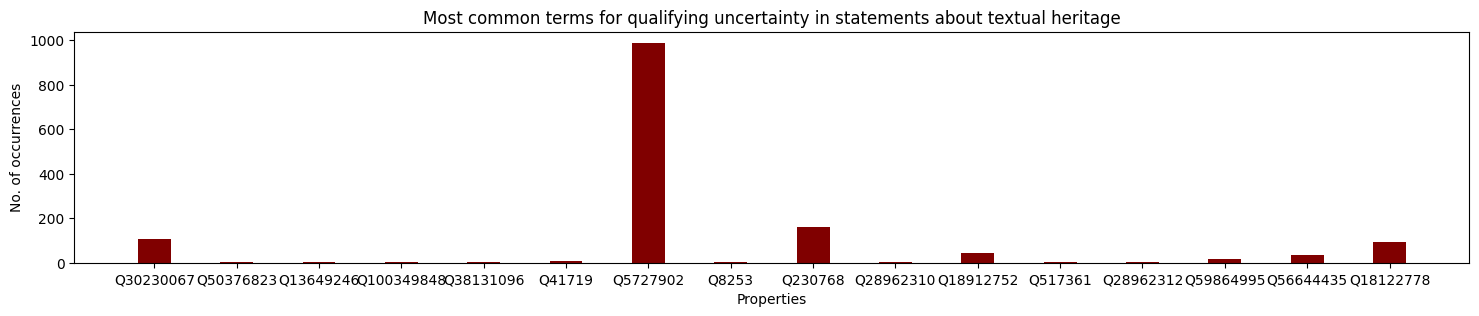

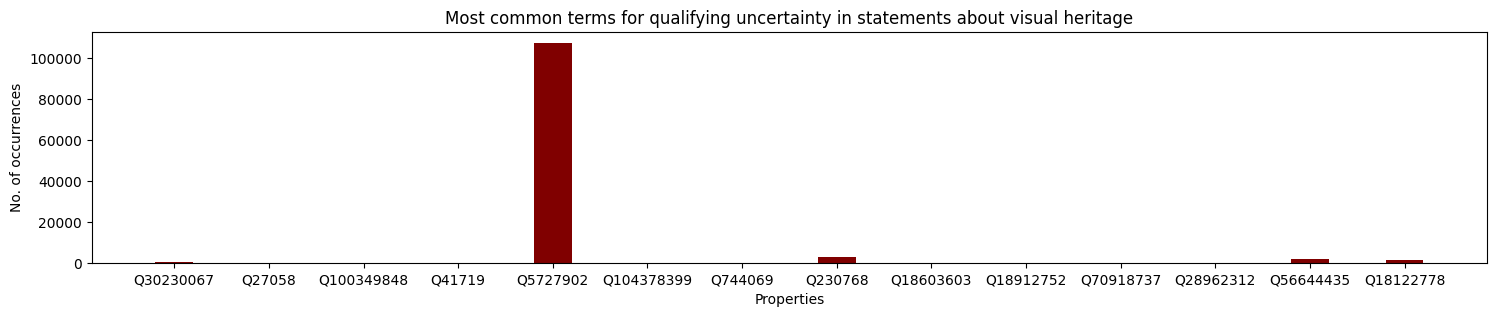

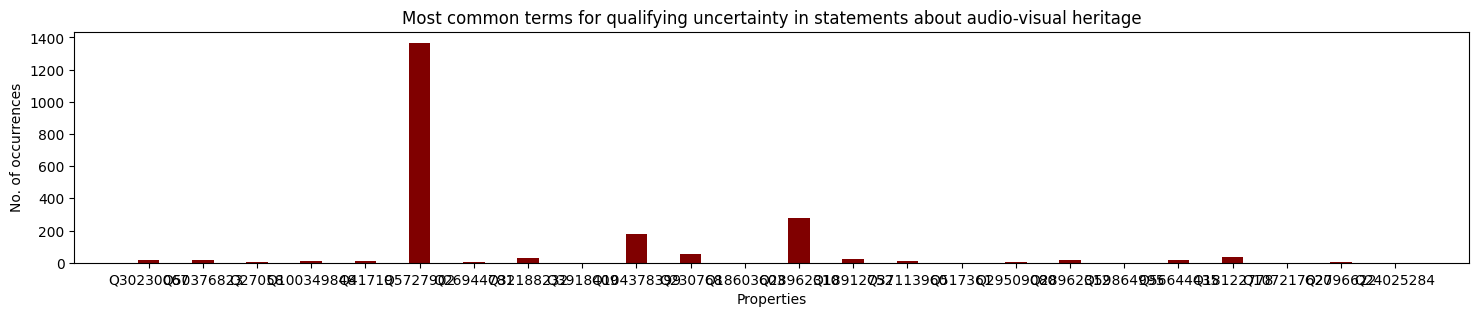

In [448]:
def most_common_barchart(bar_data, label):

    #del bar_data['approximation']
    
    p = bar_data.keys()
    v = bar_data.values()

    fig = plt.figure(figsize = (18, 3))

    plt.bar(p, v, color ='maroon',
            width = 0.4)

    plt.xlabel("Properties")
    plt.ylabel("No. of occurrences")
    plt.title(label)
    plt.show()

most_common_barchart(match_text, 'Most common terms for qualifying uncertainty in statements about textual heritage')
most_common_barchart(match_visual, 'Most common terms for qualifying uncertainty in statements about visual heritage')
most_common_barchart(match_pop, 'Most common terms for qualifying uncertainty in statements about audio-visual heritage')

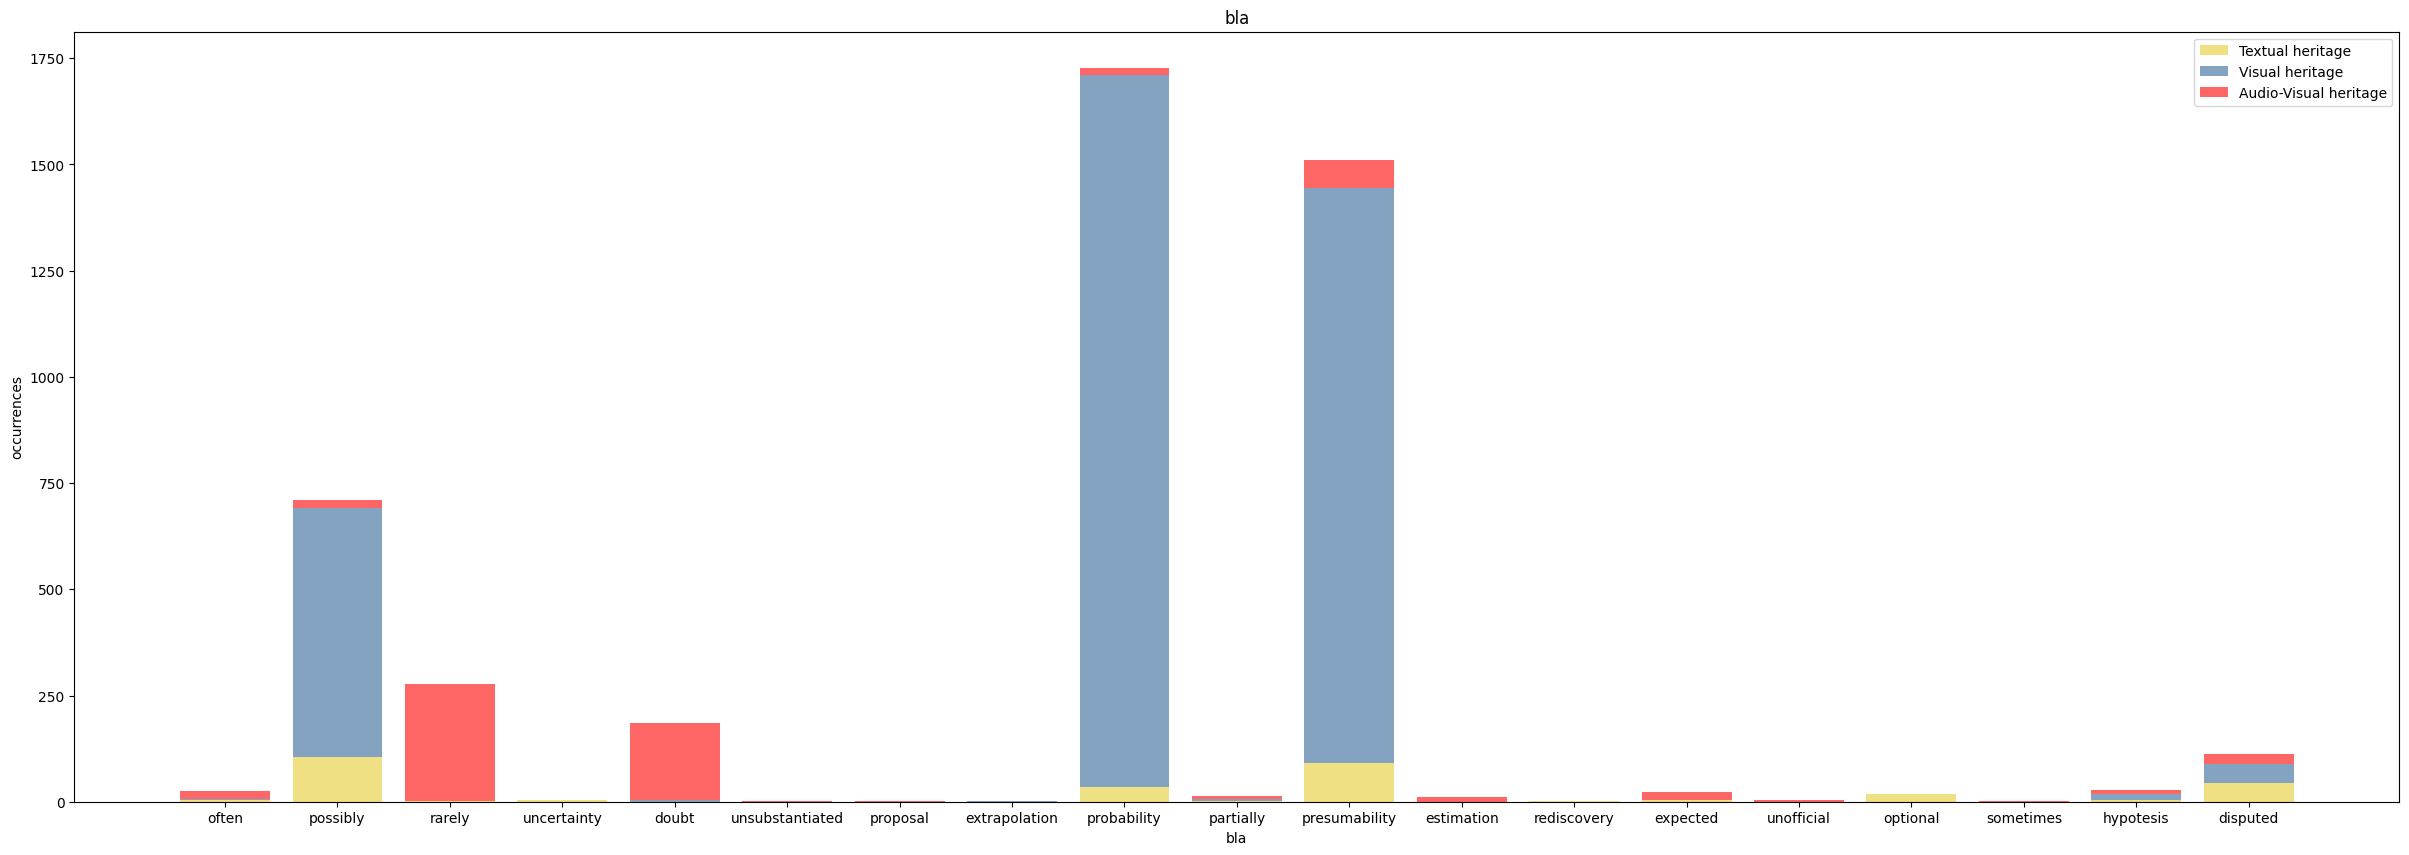

In [396]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

all_keys = set(set(match_text.keys()) | set(match_visual.keys()) | set(match_pop.keys()))

def make_chart_data(match_data):
    chart_data = []
    for x in all_keys:
        if x in match_data.keys():
            tup = (x, match_data[x])
        else:
            tup = (x, 0)
        chart_data.append(tup)
    return chart_data
        
text_chart_data = make_chart_data(match_text)
visual_chart_data = make_chart_data(match_visual)
pop_chart_data = make_chart_data(match_pop)

l1 = []
x = 0
while x < len(text_chart_data):
    l1.append(int(text_chart_data[x][1] + visual_chart_data[x][1]))
    x+=1

fig, ax = plt.subplots(figsize=(30, 10))
plt.bar(range(len(text_chart_data)), [na[1] for na in text_chart_data], align='center', color=(0.9, 0.8, 0.2, 0.6)) # giallo
plt.bar(range(len(visual_chart_data)), [nv[1] for nv in visual_chart_data], bottom=[na[1] for na in text_chart_data], align='center', color=(0.2, 0.4, 0.6, 0.6)) #azzurro
plt.bar(range(len(pop_chart_data)), [ns[1] for ns in pop_chart_data], bottom=l1, align='center', color=(1, 0, 0, 0.6)) #azzurro

plt.xticks(range(len(text_chart_data)), [na[0] for na in text_chart_data])
ax.set_title('bla')
ax.set_xlabel('bla')
ax.set_ylabel('occurrences')
labels_set = ['Textual heritage', 'Visual heritage', 'Audio-Visual heritage']
plt.legend(labels_set,loc=1)
plt.show()

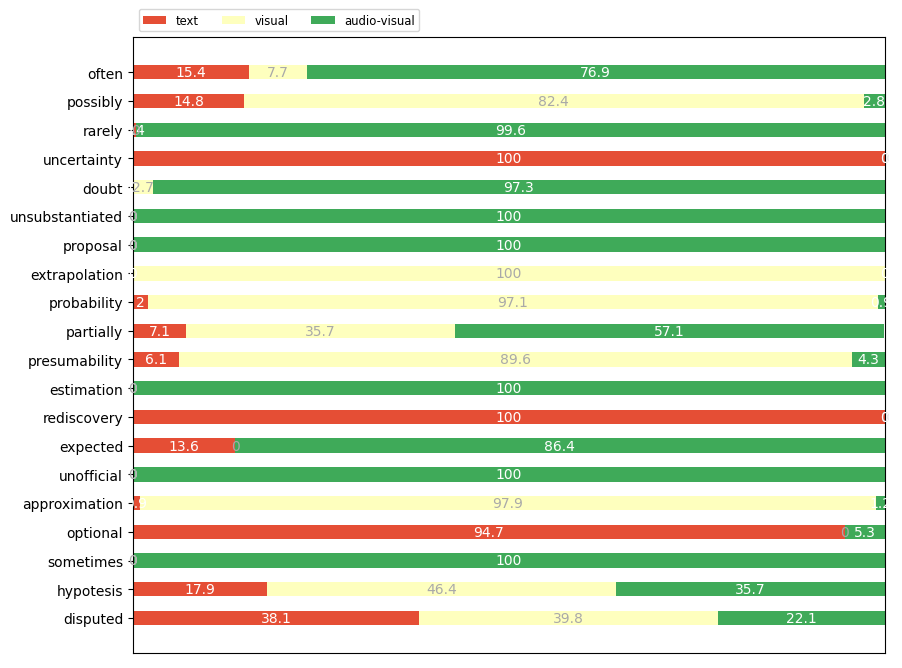

In [393]:
# https://www.google.com/search?q=horizontal+stacked+bar+chart+matplotlib&oq=horizonal+stacked+barchart+mat&aqs=edge.1.69i57j0i22i30l2j0i10i22i30j0i22i30j0i390l4.24585j0j4&sourceid=chrome&ie=UTF-8

category_names = ['text', 'visual', 'audio-visual']

results = {}
x = 0
while x < len(text_chart_data):
    #if text_chart_data[x][0] != 'approximation':
    total = text_chart_data[x][1] + visual_chart_data[x][1] + pop_chart_data[x][1]
    text_perc = round(text_chart_data[x][1] * 100 / total, 1)
    visual_perc = round(visual_chart_data[x][1] * 100 / total, 1)
    pop_perc = round(pop_chart_data[x][1] * 100 / total,1)
    results.update({text_chart_data[x][0]:[text_perc, visual_perc, pop_perc]})
    x+=1


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.7, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(results, category_names)
plt.show()

In [394]:
print(text_chart_data)

# dyad vs monad

[('often', 4), ('possibly', 105), ('rarely', 1), ('uncertainty', 3), ('doubt', 0), ('unsubstantiated', 0), ('proposal', 0), ('extrapolation', 0), ('probability', 34), ('partially', 1), ('presumability', 92), ('estimation', 0), ('rediscovery', 1), ('expected', 3), ('unofficial', 0), ('approximation', 988), ('optional', 18), ('sometimes', 0), ('hypotesis', 5), ('disputed', 43)]
